In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
import time

In [3]:
def plot_scatter(x, y, figure_title):
    plt.figure(figsize = (10,5))
    plt.title(figure_title, fontsize = 18)
    for i in range(x.shape[0]):
            plt.plot(x[i][0], x[i][1], 'ko')
    plt.show()

# Step1: Generate Data

In [4]:
num_linear_data = 100
num_XOR_data = 11

In [5]:
def generate_linear(n=100):
    pts = np.random.uniform(0, 1, (n,2))
    inputs = []
    labels = []
    
    for pt in pts:
        x, y = pt[0], pt[1]
        inputs.append([x,y])
        
#         distance = (pt[0] - pt[1]) / 1.414
        
        if(pt[0] > pt[1]):
            labels.append(0)
        else:
            labels.append(1)
    return np.array(inputs), np.array(labels).reshape(n, 1)


# print(generate_linear(n = 100))
# linear_x, linear_yHat = generate_linear(n = num_linear_data)

# plot_scatter(linear_x, linear_yHat, "Original data_linear scatter")

In [6]:
def generate_XOR(n=11):
    inputs = []
    labels = []
    for i in range(n):
        inputs.append([0.1*i, 0.1*i])
        labels.append(0)
        
        if 0.1*i == 0.5:
            continue
        inputs.append([0.1*i, (1 - 0.1*i)])
        labels.append(1)
    # return np.array(inputs), np.array(labels)
    return np.array(inputs), np.array(labels).reshape(2*n - 1, 1)

# xor_x, xor_yHat = generate_XOR(n = num_XOR_data)

# plot_scatter(xor_x, xor_yHat, "Original data_XOR scatter")

In [7]:
def generate_data(dtype = "linear", n = 100):
    if(dtype == "linear"):
        X,y = generate_linear(n)
        plot_scatter(X,y,dtype)
        return X,y
    elif(dtype == "XOR"):
        X,y = generate_XOR(n)
        plot_scatter(X,y,dtype)
        return X,y
    else:
        X,y = generate_linear(n)
        plot_scatter(X,y,dtype)
        return X,y
    

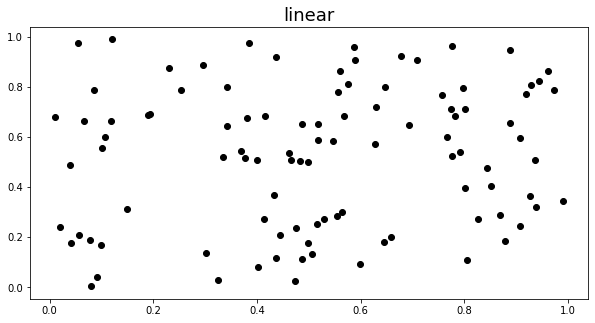

In [8]:
X_linear,y_linear = generate_data("linear", num_linear_data)



In [9]:
print("X_linear:", X_linear)
print("y_linear:", y_linear)

X_linear: [[0.99027919 0.34627387]
 [0.77608058 0.52552429]
 [0.48747843 0.65340929]
 [0.38094567 0.67476372]
 [0.14982407 0.31308734]
 [0.44416255 0.20730831]
 [0.5873215  0.95855559]
 [0.88837329 0.94894728]
 [0.70840651 0.90680371]
 [0.07756008 0.18728643]
 [0.92830943 0.80803161]
 [0.77409249 0.71052163]
 [0.12011813 0.98955005]
 [0.09961063 0.16946486]
 [0.79867639 0.79500533]
 [0.32499417 0.02798019]
 [0.29551457 0.88908297]
 [0.47269362 0.0270866 ]
 [0.80218521 0.71112999]
 [0.48661754 0.1152532 ]
 [0.56380049 0.30259929]
 [0.96190703 0.86183824]
 [0.9185172  0.7712449 ]
 [0.69275871 0.64806351]
 [0.01111885 0.67963502]
 [0.0790979  0.00390567]
 [0.3420937  0.79793348]
 [0.93749752 0.50874575]
 [0.59855426 0.09291667]
 [0.43219443 0.36790638]
 [0.56066821 0.8640996 ]
 [0.40051468 0.50653085]
 [0.57665537 0.81135473]
 [0.49876343 0.17783945]
 [0.80552953 0.11056508]
 [0.50711552 0.13276457]
 [0.92776172 0.36607812]
 [0.64795085 0.80115624]
 [0.51603006 0.25380745]
 [0.54660751 0.

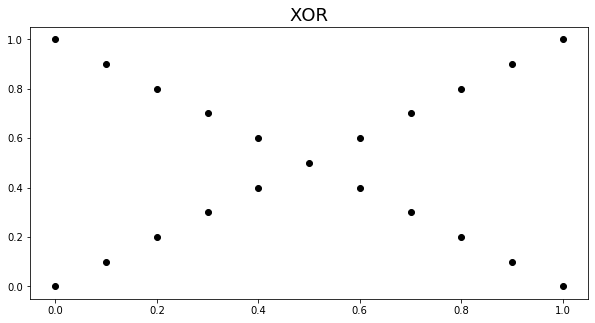

In [10]:
X_XOR, y_XOR = generate_data("XOR", num_XOR_data)


In [11]:
print("X_XOR:", X_XOR)
print("Y_XOR:", y_XOR)

X_XOR: [[0.  0. ]
 [0.  1. ]
 [0.1 0.1]
 [0.1 0.9]
 [0.2 0.2]
 [0.2 0.8]
 [0.3 0.3]
 [0.3 0.7]
 [0.4 0.4]
 [0.4 0.6]
 [0.5 0.5]
 [0.6 0.6]
 [0.6 0.4]
 [0.7 0.7]
 [0.7 0.3]
 [0.8 0.8]
 [0.8 0.2]
 [0.9 0.9]
 [0.9 0.1]
 [1.  1. ]
 [1.  0. ]]
Y_XOR: [[0]
 [1]
 [0]
 [1]
 [0]
 [1]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [1]
 [0]
 [1]
 [0]
 [1]]


 # Step2: Create Model

## BackPropagation for Nerual Network

In [12]:
class NeuralNetwork(object):
    def __init__(self):
        # parameter
        self.inputSize = 2
        self.outputSize = 1
        self.hiddenSize = 3
        
        # input  matrix size: X_linear(100x2), X_XOR(21x2)
        # output matrix size: y_linear(100x1), y_XOR(21X1)
        
        # weight
        self.W1 = np.random.randn(self.inputSize, self.hiddenSize)  # (2x3) weight matrix from input to hidden layer
        self.W2 = np.random.randn(self.hiddenSize, self.outputSize) # (3x1) weight matrix form hidden to output layer
        

    def initial_weights(self):
        # weight
        self.W1 = np.random.randn(self.inputSize, self.hiddenSize)  # (2x3) weight matrix from input to hidden layer
        self.W2 = np.random.randn(self.hiddenSize, self.outputSize) # (3x1) weight matrix form hidden to output layer
    
    
    def activation_function(self, fnc_name, deriv, Z):
        if(deriv == False):
            if(fnc_name == "sigmoid"):
                return 1 / (1 + np.exp(-Z))
            elif(fnc_name == "ReLU"):
                return np.maximum(self.Z, 0) 
            else:
                return 1 / (1 + np.exp(-Z))
        else:
            if(fnc_name == "sigmoid"):
                return Z * (1 - Z)
            elif(fnc_name == "ReLU"):
                return Z > 0
            else:
                return Z * (1 - Z)
    
    
    def forward(self, X):
        # forward propatation throgh the network
              
        ##### input layer -> hidden layer #####
        self.Z1 = np.dot(X, self.W1) 
        """
        dot product of X (input) and first set of weights
        ---------------------------------------------------------
        1) X_linear(100x2) ． W1(2x3) = Z1_linear(100x3)
        2)     X_XOR(21x2) ． W1(2x3) = Z1_XOR(21x3)
        ---------------------------------------------------------
        """ 
        
        self.A1 = self.activation_function(fnc_name = "sigmoid", deriv = False, Z = self.Z1)
        """ 
        activation function
        ---------------------------------------------------------
        1) sigmoid(Z1_linear)(100x3) = A1_linear(100x3)
        2) sigmoid(Z1_XOR)(21x3)     = A1_XOR(21x3)    
        ---------------------------------------------------------
        """
        
        ##### hidden layer -> output layer #####
        self.Z2 = np.dot(self.A1, self.W2)
        """
        dot product of hidden layer(A1) and second set of weights
        ---------------------------------------------------------
        1) A1_linear(100x3) ． W2(3x1) = Z2_linear(100x1)
        2)     A1_XOR(21x3) ． W2(3x1) = Z2_XOR(21x1)
        
        --------------------------------------------------------- 
        """
        
        output = self.activation_function(fnc_name = "sigmoid", deriv = False, Z = self.Z2)
        """ 
        activation function
        ---------------------------------------------------------
        1) sigmoid(Z2_linear)(100x1) = output_linear(100x1)
        2) sigmoid(Z2_XOR)(21x1)     = output_XOR(21x1)    
        ---------------------------------------------------------
        """
        
        return output
        
    
            
    def backward(self, X, y, output):
        # backward propataion through the network
        
        ##### output layer -> hidden layer #####
        self.output_error =  y - output 
        """
        error in output = actual value(label form training set) - predicetd output
        ----------------------------------------------------------------------------------------------------
        1) output_error_linear(100x1) = y_linear(100x1) - output_linear(100x1)
        2) output_error_XOR(21x1)     = y_XOR(21x1)     - output_XOR(21x1)
        ----------------------------------------------------------------------------------------------------
        """
        
        self.output_delta = self.output_error * self.activation_function(fnc_name = "sigmoid", deriv = True, Z = output)
        """
        output delta = output error * sigmoid'(output)  , where the output is determined in the forward pass
        ----------------------------------------------------------------------------------------------------
        1) output_delta_linear(100x1) = output_error_linear(100x1) * sigmoid'(output_linear)(constant)
        2) output_delta_XOR(21x1)     = output_error_XOR(21x1)     * sigmoid'(output_XOR)(constant)
        ----------------------------------------------------------------------------------------------------
        """
        
        
        ##### hidden layer -> input layer #####
        self.A1_error = np.dot(self.output_delta, self.W2.T)
        """
        A1 error = output delta ． W2^T
        A1 error: how much our hidden layer weights contribute to output error (from chain rule)
        ----------------------------------------------------------------------------------------------------
        1) A1_error_linear(100x1) = output_delta_linear(100x1) ． W2^T(1x3)
        2) A1_error_XOR(21x1)     = output_delta__XOR(21x1)    ． W2^T(1x3)
        ----------------------------------------------------------------------------------------------------
        """
        
        self.A1_delta = self.A1_error * self.activation_function(fnc_name = "sigmoid", deriv = True, Z = self.A1)
        """
        A1 delta = A1 error * sigmoid'(A1)  , where the A1 is determined in the forward pass
        Applying derivative of sigmoid to A1 error
        ----------------------------------------------------------------------------------------------------
        1) A1_delta_linear(100x1) = A1_error_linear(100x1) * sigmoid'(A1_linear)(constant)
        2) A1_delta_XOR(21x1)     = A1_error_XOR(21x1)     * sigmoid'(A1_XOR)(constant)
        ----------------------------------------------------------------------------------------------------
        """
        
        
        
        
    def update_parameters(self, X):
        # update the parameters
        
        # adjusting first set (input layer -> hidden layer) weights
        self.W1 += np.dot(X.T, self.A1_delta) 
        
        # adjusting second set (hidden layer -> output layer) weights
        self.W2 += np.dot(self.A1.T, self.output_delta)
    
    
    def train(self, X, y):
        # Step1: forward propagation
        self.output = self.forward(X)
        
        # Step2: backward propagation
        self.backward(X, y, self.output)
        
        # Step3: update the parameters
        self.update_parameters(X)
        return self.output

# Step3: Train Model

## Linear

In [13]:
NN_linear = NeuralNetwork()

In [14]:
# train the NN 1000 times
for i in range(1000):
    if(i % 100 == 0):
        NN_linear.train(X_linear, y_linear)
        loss_linear = y_linear - NN_linear.forward(X_linear)
        print("Iteration " + str(i) +", Loss: " + str(np.mean(np.square(loss_linear))))
    NN_linear.train(X_linear, y_linear)

print("Input: " + "\n" + str(X_linear))
print("Actual Output: " + "\n" + str(y_linear))
print("Loss: " + "\n" + str(np.mean(np.square(loss_linear))))
print("\n")
print("Predicted Output: " + "\n" + str(NN_linear.forward(X_linear)))

Iteration 0, Loss: 0.30816283222471275
Iteration 100, Loss: 0.022905844390928656
Iteration 200, Loss: 0.00751055197639299
Iteration 300, Loss: 0.00812324162185879
Iteration 400, Loss: 0.0052805502565849635
Iteration 500, Loss: 0.007203896838256437
Iteration 600, Loss: 0.004093521088238437
Iteration 700, Loss: 0.0031695965732281618
Iteration 800, Loss: 0.007030363233822909
Iteration 900, Loss: 0.006500901849769508
Input: 
[[0.99027919 0.34627387]
 [0.77608058 0.52552429]
 [0.48747843 0.65340929]
 [0.38094567 0.67476372]
 [0.14982407 0.31308734]
 [0.44416255 0.20730831]
 [0.5873215  0.95855559]
 [0.88837329 0.94894728]
 [0.70840651 0.90680371]
 [0.07756008 0.18728643]
 [0.92830943 0.80803161]
 [0.77409249 0.71052163]
 [0.12011813 0.98955005]
 [0.09961063 0.16946486]
 [0.79867639 0.79500533]
 [0.32499417 0.02798019]
 [0.29551457 0.88908297]
 [0.47269362 0.0270866 ]
 [0.80218521 0.71112999]
 [0.48661754 0.1152532 ]
 [0.56380049 0.30259929]
 [0.96190703 0.86183824]
 [0.9185172  0.7712449 ]


## XOR

In [15]:
NN_XOR = NeuralNetwork()

In [16]:
# train the NN 1000 times
for i in range(1000):
    if(i % 100 == 0):
        loss_XOR = y_XOR - NN_XOR.forward(X_XOR)
        print("Iteration " + str(i) +", Loss: " + str(np.mean(np.square(loss_XOR))))
    NN_XOR.train(X_XOR, y_XOR)

print("Input: " + "\n" + str(X_XOR))
print("Actual Output: " + "\n" + str(y_XOR))
print("Loss: " + "\n" + str(np.mean(np.square(loss_XOR))))
print("\n")
print("Predicted Output: " + "\n" + str(NN_XOR.forward(X_XOR)))

Iteration 0, Loss: 0.28897507557293967
Iteration 100, Loss: 0.2694093720205513
Iteration 200, Loss: 0.05769180432136642
Iteration 300, Loss: 0.03126432427420344
Iteration 400, Loss: 0.01790321325330675
Iteration 500, Loss: 0.011092240101041182
Iteration 600, Loss: 0.007500018011995842
Iteration 700, Loss: 0.0054499439224641585
Iteration 800, Loss: 0.004182520882709643
Iteration 900, Loss: 0.0033442579873634894
Input: 
[[0.  0. ]
 [0.  1. ]
 [0.1 0.1]
 [0.1 0.9]
 [0.2 0.2]
 [0.2 0.8]
 [0.3 0.3]
 [0.3 0.7]
 [0.4 0.4]
 [0.4 0.6]
 [0.5 0.5]
 [0.6 0.6]
 [0.6 0.4]
 [0.7 0.7]
 [0.7 0.3]
 [0.8 0.8]
 [0.8 0.2]
 [0.9 0.9]
 [0.9 0.1]
 [1.  1. ]
 [1.  0. ]]
Actual Output: 
[[0]
 [1]
 [0]
 [1]
 [0]
 [1]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [1]
 [0]
 [1]
 [0]
 [1]]
Loss: 
0.0033442579873634894


Predicted Output: 
[[0.04931455]
 [0.99161268]
 [0.07017757]
 [0.9916397 ]
 [0.08494788]
 [0.99154316]
 [0.08186887]
 [0.98941988]
 [0.0641448 ]
 [0.88068123]
 [0.04375459]
 [0.02812152]
 [0.88

## Show Result

In [17]:
class show_result(NeuralNetwork): # Inheritance
    def __init__(self):
        self.epoch = 500000
        self.num_show = 100
        self.NN = NeuralNetwork()
        
        
    def plot_loss(self, X, y):
        
        loss = np.zeros(int(self.epoch/self.num_show))
        
        self.NN.initial_weights()
        for i in range(self.epoch):
            self.NN.train(X, y)
            if((i == 0) or (i % self.num_show == 0) or (i == self.epoch)):
                # Mean Square Error(MSE)
                loss[i % self.num_show] = np.mean(np.square(y - self.NN.forward(X)))
                print("Epoch " + str(i) + "  Loss: " + str(loss[i % self.num_show]))
                # print(self.NN.forward(X))
        
        plt.title("Loss", fontsize = 18)
        plt.plot(loss)
        plt.xlabel("number of epoch")
        plt.show()
        return loss
    
    def timer(self, state = "start"):
        if(state == "start"):
            self.start_time = time.time()
        elif(state == "end"):
            self.end_time = time.time()
        elif(state == "show"):
            self.execution_time = self.end_time - self.start_time
            print("Execution time: %f sec" %(self.execution_time))
            return self.execution_time
    
    def show_plot(self, X, y, title_name):
        plt.figure(figsize=(10,5))
        
        plt.suptitle(title_name, fontsize = 24)
        
        plt.subplot(1,2,1)
        plt.title("Ground truth", fontsize = 18)
        for i in range(X.shape[0]):
            if y[i] == 0:
                plt.plot(X[i][0], X[i][1], 'ro') # i-th data
            else:
                plt.plot(X[i][0], X[i][1], 'bo')
        
        plt.subplot(1,2,2)
        plt.title("Predict result", fontsize = 18)
        self.output = self.NN.forward(X)
        for i in range(X.shape[0]):
            if (np.around(self.output[i]) == 0):
                plt.plot(X[i][0], X[i][1], 'ro') # i-th data
            else:
                plt.plot(X[i][0], X[i][1], 'bo')
        
        
        plt.show()
        print(np.around(self.NN.forward(X)))

## Result: Linear

In [18]:
result_linear = show_result()

Epoch 0  Loss: 0.24721783563154648
Epoch 100  Loss: 0.021993014263270584
Epoch 200  Loss: 0.0073778397750631376
Epoch 300  Loss: 0.0059865123969305946
Epoch 400  Loss: 0.005338537841037565
Epoch 500  Loss: 0.004945936426766016
Epoch 600  Loss: 0.006647247432248404
Epoch 700  Loss: 0.010144592422591032
Epoch 800  Loss: 0.0073786819337763355
Epoch 900  Loss: 0.006161737074471513
Epoch 1000  Loss: 0.005057813328087915
Epoch 1100  Loss: 0.0035127565105723935
Epoch 1200  Loss: 0.004809896578454886
Epoch 1300  Loss: 0.0027343620716199957
Epoch 1400  Loss: 0.007846837861701277
Epoch 1500  Loss: 0.004733466369737271
Epoch 1600  Loss: 0.0034805044406327106
Epoch 1700  Loss: 0.005421685219553572
Epoch 1800  Loss: 0.0020932796326989015
Epoch 1900  Loss: 0.007264598320828335
Epoch 2000  Loss: 0.002187099782563685
Epoch 2100  Loss: 0.0082939441803954
Epoch 2200  Loss: 0.002269755659480791
Epoch 2300  Loss: 0.004655778090776592
Epoch 2400  Loss: 0.0020873350795617865
Epoch 2500  Loss: 0.005993709669

Epoch 23300  Loss: 3.1812161302879175e-05
Epoch 23400  Loss: 3.1625800658584364e-05
Epoch 23500  Loss: 3.144149983391408e-05
Epoch 23600  Loss: 3.125922554414364e-05
Epoch 23700  Loss: 3.1078945211037176e-05
Epoch 23800  Loss: 3.0900626944285894e-05
Epoch 23900  Loss: 3.072423952351776e-05
Epoch 24000  Loss: 3.054975238087955e-05
Epoch 24100  Loss: 3.0377135584151203e-05
Epoch 24200  Loss: 3.0206359820381378e-05
Epoch 24300  Loss: 3.0037396380031798e-05
Epoch 24400  Loss: 2.987021714159803e-05
Epoch 24500  Loss: 2.970479455670228e-05
Epoch 24600  Loss: 2.9541101635632616e-05
Epoch 24700  Loss: 2.937911193332691e-05
Epoch 24800  Loss: 2.9218799535757422e-05
Epoch 24900  Loss: 2.9060139046744858e-05
Epoch 25000  Loss: 2.8903105575140956e-05
Epoch 25100  Loss: 2.8747674722404112e-05
Epoch 25200  Loss: 2.859382257053087e-05
Epoch 25300  Loss: 2.8441525670344758e-05
Epoch 25400  Loss: 2.829076103012258e-05
Epoch 25500  Loss: 2.8141506104548837e-05
Epoch 25600  Loss: 2.7993738783992717e-05
E

Epoch 45700  Loss: 1.3334623244654507e-05
Epoch 45800  Loss: 1.3298891005356751e-05
Epoch 45900  Loss: 1.326334120232014e-05
Epoch 46000  Loss: 1.3227972467630523e-05
Epoch 46100  Loss: 1.3192783446874114e-05
Epoch 46200  Loss: 1.3157772798973971e-05
Epoch 46300  Loss: 1.312293919602502e-05
Epoch 46400  Loss: 1.3088281323135735e-05
Epoch 46500  Loss: 1.3053797878269937e-05
Epoch 46600  Loss: 1.3019487572090019e-05
Epoch 46700  Loss: 1.2985349127804161e-05
Epoch 46800  Loss: 1.2951381281014962e-05
Epoch 46900  Loss: 1.2917582779571725e-05
Epoch 47000  Loss: 1.2883952383420659e-05
Epoch 47100  Loss: 1.2850488864462892e-05
Epoch 47200  Loss: 1.2817191006410737e-05
Epoch 47300  Loss: 1.2784057604646728e-05
Epoch 47400  Loss: 1.2751087466083611e-05
Epoch 47500  Loss: 1.2718279409030581e-05
Epoch 47600  Loss: 1.2685632263057414e-05
Epoch 47700  Loss: 1.2653144868858806e-05
Epoch 47800  Loss: 1.2620816078128037e-05
Epoch 47900  Loss: 1.25886447534228e-05
Epoch 48000  Loss: 1.255662976804232e-

Epoch 68300  Loss: 8.225499379041958e-06
Epoch 68400  Loss: 8.211310727602463e-06
Epoch 68500  Loss: 8.197168924933388e-06
Epoch 68600  Loss: 8.183073743291607e-06
Epoch 68700  Loss: 8.169024956394091e-06
Epoch 68800  Loss: 8.15502233940616e-06
Epoch 68900  Loss: 8.14106566893036e-06
Epoch 69000  Loss: 8.127154722993146e-06
Epoch 69100  Loss: 8.113289281036634e-06
Epoch 69200  Loss: 8.099469123905131e-06
Epoch 69300  Loss: 8.085694033834753e-06
Epoch 69400  Loss: 8.071963794442473e-06
Epoch 69500  Loss: 8.058278190715567e-06
Epoch 69600  Loss: 8.04463700900011e-06
Epoch 69700  Loss: 8.031040036991204e-06
Epoch 69800  Loss: 8.017487063721486e-06
Epoch 69900  Loss: 8.003977879552301e-06
Epoch 70000  Loss: 7.990512276160685e-06
Epoch 70100  Loss: 7.977090046531165e-06
Epoch 70200  Loss: 7.963710984945502e-06
Epoch 70300  Loss: 7.950374886971813e-06
Epoch 70400  Loss: 7.937081549455027e-06
Epoch 70500  Loss: 7.923830770506455e-06
Epoch 70600  Loss: 7.910622349495273e-06
Epoch 70700  Loss: 

Epoch 91100  Loss: 5.87681193787756e-06
Epoch 91200  Loss: 5.869367174417688e-06
Epoch 91300  Loss: 5.861940513423158e-06
Epoch 91400  Loss: 5.854531889992244e-06
Epoch 91500  Loss: 5.847141239530117e-06
Epoch 91600  Loss: 5.839768497747985e-06
Epoch 91700  Loss: 5.832413600659797e-06
Epoch 91800  Loss: 5.825076484581915e-06
Epoch 91900  Loss: 5.817757086130248e-06
Epoch 92000  Loss: 5.810455342219539e-06
Epoch 92100  Loss: 5.803171190060261e-06
Epoch 92200  Loss: 5.795904567158234e-06
Epoch 92300  Loss: 5.788655411311814e-06
Epoch 92400  Loss: 5.78142366061163e-06
Epoch 92500  Loss: 5.774209253436706e-06
Epoch 92600  Loss: 5.767012128455203e-06
Epoch 92700  Loss: 5.759832224620702e-06
Epoch 92800  Loss: 5.752669481172326e-06
Epoch 92900  Loss: 5.745523837631212e-06
Epoch 93000  Loss: 5.738395233800298e-06
Epoch 93100  Loss: 5.731283609762825e-06
Epoch 93200  Loss: 5.724188905879134e-06
Epoch 93300  Loss: 5.717111062786426e-06
Epoch 93400  Loss: 5.710050021397611e-06
Epoch 93500  Loss:

Epoch 113900  Loss: 4.5479889194239566e-06
Epoch 114000  Loss: 4.543440533419879e-06
Epoch 114100  Loss: 4.538900895087714e-06
Epoch 114200  Loss: 4.534369979596688e-06
Epoch 114300  Loss: 4.529847762209205e-06
Epoch 114400  Loss: 4.52533421828052e-06
Epoch 114500  Loss: 4.52082932325784e-06
Epoch 114600  Loss: 4.516333052680343e-06
Epoch 114700  Loss: 4.511845382178488e-06
Epoch 114800  Loss: 4.507366287473764e-06
Epoch 114900  Loss: 4.502895744378392e-06
Epoch 115000  Loss: 4.498433728794262e-06
Epoch 115100  Loss: 4.4939802167132e-06
Epoch 115200  Loss: 4.489535184216283e-06
Epoch 115300  Loss: 4.485098607473626e-06
Epoch 115400  Loss: 4.480670462743751e-06
Epoch 115500  Loss: 4.476250726372881e-06
Epoch 115600  Loss: 4.471839374795364e-06
Epoch 115700  Loss: 4.467436384532419e-06
Epoch 115800  Loss: 4.463041732192314e-06
Epoch 115900  Loss: 4.458655394469887e-06
Epoch 116000  Loss: 4.4542773481456095e-06
Epoch 116100  Loss: 4.449907570085887e-06
Epoch 116200  Loss: 4.44554603724245

Epoch 136600  Loss: 3.7004247152567977e-06
Epoch 136700  Loss: 3.697366857557382e-06
Epoch 136800  Loss: 3.6943138660259108e-06
Epoch 136900  Loss: 3.6912657292249552e-06
Epoch 137000  Loss: 3.6882224357525166e-06
Epoch 137100  Loss: 3.685183974242074e-06
Epoch 137200  Loss: 3.6821503333625032e-06
Epoch 137300  Loss: 3.679121501817301e-06
Epoch 137400  Loss: 3.67609746834555e-06
Epoch 137500  Loss: 3.6730782217208578e-06
Epoch 137600  Loss: 3.6700637507514913e-06
Epoch 137700  Loss: 3.6670540442804778e-06
Epoch 137800  Loss: 3.664049091185293e-06
Epoch 137900  Loss: 3.661048880377444e-06
Epoch 138000  Loss: 3.658053400802903e-06
Epoch 138100  Loss: 3.655062641441799e-06
Epoch 138200  Loss: 3.6520765913077055e-06
Epoch 138300  Loss: 3.649095239448367e-06
Epoch 138400  Loss: 3.6461185749452968e-06
Epoch 138500  Loss: 3.643146586913119e-06
Epoch 138600  Loss: 3.6401792645001383e-06
Epoch 138700  Loss: 3.637216596888028e-06
Epoch 138800  Loss: 3.634258573291371e-06
Epoch 138900  Loss: 3.63

Epoch 158500  Loss: 3.130005926095476e-06
Epoch 158600  Loss: 3.12779141957184e-06
Epoch 158700  Loss: 3.125579933518329e-06
Epoch 158800  Loss: 3.123371461846738e-06
Epoch 158900  Loss: 3.1211659984854024e-06
Epoch 159000  Loss: 3.118963537378576e-06
Epoch 159100  Loss: 3.116764072486804e-06
Epoch 159200  Loss: 3.114567597786472e-06
Epoch 159300  Loss: 3.1123741072701788e-06
Epoch 159400  Loss: 3.1101835949464927e-06
Epoch 159500  Loss: 3.1079960548395075e-06
Epoch 159600  Loss: 3.105811480989901e-06
Epoch 159700  Loss: 3.103629867453327e-06
Epoch 159800  Loss: 3.1014512083017346e-06
Epoch 159900  Loss: 3.099275497622687e-06
Epoch 160000  Loss: 3.0971027295190343e-06
Epoch 160100  Loss: 3.094932898109789e-06
Epoch 160200  Loss: 3.092765997528879e-06
Epoch 160300  Loss: 3.090602021926396e-06
Epoch 160400  Loss: 3.0884409654673417e-06
Epoch 160500  Loss: 3.086282822332318e-06
Epoch 160600  Loss: 3.0841275867171186e-06
Epoch 160700  Loss: 3.081975252833205e-06
Epoch 160800  Loss: 3.07982

Epoch 180400  Loss: 2.7079424371296884e-06
Epoch 180500  Loss: 2.706267818966436e-06
Epoch 180600  Loss: 2.7045951989932453e-06
Epoch 180700  Loss: 2.7029245736855047e-06
Epoch 180800  Loss: 2.701255939526327e-06
Epoch 180900  Loss: 2.6995892930072205e-06
Epoch 181000  Loss: 2.69792463062779e-06
Epoch 181100  Loss: 2.696261948895847e-06
Epoch 181200  Loss: 2.6946012443273777e-06
Epoch 181300  Loss: 2.692942513446336e-06
Epoch 181400  Loss: 2.691285752784921e-06
Epoch 181500  Loss: 2.6896309588833083e-06
Epoch 181600  Loss: 2.68797812828953e-06
Epoch 181700  Loss: 2.6863272575598986e-06
Epoch 181800  Loss: 2.6846783432586066e-06
Epoch 181900  Loss: 2.6830313819578462e-06
Epoch 182000  Loss: 2.681386370237862e-06
Epoch 182100  Loss: 2.6797433046863405e-06
Epoch 182200  Loss: 2.678102181899645e-06
Epoch 182300  Loss: 2.676462998481351e-06
Epoch 182400  Loss: 2.6748257510430434e-06
Epoch 182500  Loss: 2.673190436204203e-06
Epoch 182600  Loss: 2.671557050592295e-06
Epoch 182700  Loss: 2.669

Epoch 202400  Loss: 2.3821861719318186e-06
Epoch 202500  Loss: 2.3808786657429126e-06
Epoch 202600  Loss: 2.3795725452788944e-06
Epoch 202700  Loss: 2.378267808367977e-06
Epoch 202800  Loss: 2.3769644528424167e-06
Epoch 202900  Loss: 2.375662476539302e-06
Epoch 203000  Loss: 2.3743618773000248e-06
Epoch 203100  Loss: 2.3730626529705323e-06
Epoch 203200  Loss: 2.3717648014011785e-06
Epoch 203300  Loss: 2.3704683204469893e-06
Epoch 203400  Loss: 2.369173207966905e-06
Epoch 203500  Loss: 2.367879461824784e-06
Epoch 203600  Loss: 2.366587079888643e-06
Epoch 203700  Loss: 2.365296060031044e-06
Epoch 203800  Loss: 2.3640064001289274e-06
Epoch 203900  Loss: 2.3627180980634864e-06
Epoch 204000  Loss: 2.361431151720203e-06
Epoch 204100  Loss: 2.3601455589892654e-06
Epoch 204200  Loss: 2.358861317764972e-06
Epoch 204300  Loss: 2.3575784259458907e-06
Epoch 204400  Loss: 2.3562968814350143e-06
Epoch 204500  Loss: 2.355016682139745e-06
Epoch 204600  Loss: 2.3537378259715835e-06
Epoch 204700  Loss: 

Epoch 224000  Loss: 2.1287017403588828e-06
Epoch 224100  Loss: 2.1276496701828445e-06
Epoch 224200  Loss: 2.12659860464706e-06
Epoch 224300  Loss: 2.1255485423321817e-06
Epoch 224400  Loss: 2.1244994818216244e-06
Epoch 224500  Loss: 2.1234514217014605e-06
Epoch 224600  Loss: 2.1224043605604744e-06
Epoch 224700  Loss: 2.121358296989689e-06
Epoch 224800  Loss: 2.120313229583359e-06
Epoch 224900  Loss: 2.119269156937867e-06
Epoch 225000  Loss: 2.1182260776523894e-06
Epoch 225100  Loss: 2.117183990328802e-06
Epoch 225200  Loss: 2.1161428935714398e-06
Epoch 225300  Loss: 2.115102785987291e-06
Epoch 225400  Loss: 2.1140636661859618e-06
Epoch 225500  Loss: 2.1130255327796064e-06
Epoch 225600  Loss: 2.111988384382988e-06
Epoch 225700  Loss: 2.1109522196133554e-06
Epoch 225800  Loss: 2.109917037090766e-06
Epoch 225900  Loss: 2.1088828354374484e-06
Epoch 226000  Loss: 2.1078496132786305e-06
Epoch 226100  Loss: 2.1068173692416374e-06
Epoch 226200  Loss: 2.105786101956767e-06
Epoch 226300  Loss: 2

Epoch 243700  Loss: 1.939206624683672e-06
Epoch 243800  Loss: 1.9383280583084293e-06
Epoch 243900  Loss: 1.9374502613792585e-06
Epoch 244000  Loss: 1.9365732328992056e-06
Epoch 244100  Loss: 1.935696971872548e-06
Epoch 244200  Loss: 1.9348214773056213e-06
Epoch 244300  Loss: 1.933946748206361e-06
Epoch 244400  Loss: 1.933072783584419e-06
Epoch 244500  Loss: 1.9321995824511398e-06
Epoch 244600  Loss: 1.9313271438195077e-06
Epoch 244700  Loss: 1.930455466704218e-06
Epoch 244800  Loss: 1.929584550121777e-06
Epoch 244900  Loss: 1.9287143930901504e-06
Epoch 245000  Loss: 1.927844994629215e-06
Epoch 245100  Loss: 1.9269763537603523e-06
Epoch 245200  Loss: 1.926108469506586e-06
Epoch 245300  Loss: 1.925241340892766e-06
Epoch 245400  Loss: 1.9243749669453533e-06
Epoch 245500  Loss: 1.923509346692277e-06
Epoch 245600  Loss: 1.922644479163524e-06
Epoch 245700  Loss: 1.9217803633903433e-06
Epoch 245800  Loss: 1.9209169984057734e-06
Epoch 245900  Loss: 1.920054383244605e-06
Epoch 246000  Loss: 1.9

Epoch 266500  Loss: 1.7570323910287122e-06
Epoch 266600  Loss: 1.7563064281658097e-06
Epoch 266700  Loss: 1.7555810454328454e-06
Epoch 266800  Loss: 1.7548562421437523e-06
Epoch 266900  Loss: 1.7541320176133864e-06
Epoch 267000  Loss: 1.7534083711577014e-06
Epoch 267100  Loss: 1.7526853020937109e-06
Epoch 267200  Loss: 1.751962809739657e-06
Epoch 267300  Loss: 1.7512408934145505e-06
Epoch 267400  Loss: 1.7505195524387076e-06
Epoch 267500  Loss: 1.7497987861334822e-06
Epoch 267600  Loss: 1.7490785938211596e-06
Epoch 267700  Loss: 1.748358974825131e-06
Epoch 267800  Loss: 1.7476399284700243e-06
Epoch 267900  Loss: 1.7469214540811884e-06
Epoch 268000  Loss: 1.7462035509851924e-06
Epoch 268100  Loss: 1.7454862185098158e-06
Epoch 268200  Loss: 1.7447694559836548e-06
Epoch 268300  Loss: 1.7440532627364276e-06
Epoch 268400  Loss: 1.7433376380988676e-06
Epoch 268500  Loss: 1.7426225814028841e-06
Epoch 268600  Loss: 1.7419080919812521e-06
Epoch 268700  Loss: 1.7411941691678183e-06
Epoch 268800 

Epoch 285700  Loss: 1.627542857033281e-06
Epoch 285800  Loss: 1.626916839253175e-06
Epoch 285900  Loss: 1.6262912873657012e-06
Epoch 286000  Loss: 1.6256662008575475e-06
Epoch 286100  Loss: 1.625041579216085e-06
Epoch 286200  Loss: 1.6244174219295827e-06
Epoch 286300  Loss: 1.6237937284870288e-06
Epoch 286400  Loss: 1.623170498378059e-06
Epoch 286500  Loss: 1.622547731093114e-06
Epoch 286600  Loss: 1.6219254261233274e-06
Epoch 286700  Loss: 1.6213035829607273e-06
Epoch 286800  Loss: 1.6206822010979531e-06
Epoch 286900  Loss: 1.6200612800283295e-06
Epoch 287000  Loss: 1.619440819246044e-06
Epoch 287100  Loss: 1.6188208182458994e-06
Epoch 287200  Loss: 1.6182012765236559e-06
Epoch 287300  Loss: 1.6175821935754287e-06
Epoch 287400  Loss: 1.6169635688984541e-06
Epoch 287500  Loss: 1.6163454019904711e-06
Epoch 287600  Loss: 1.6157276923499956e-06
Epoch 287700  Loss: 1.615110439476282e-06
Epoch 287800  Loss: 1.6144936428692904e-06
Epoch 287900  Loss: 1.6138773020298132e-06
Epoch 288000  Loss

Epoch 308700  Loss: 1.4948792868119888e-06
Epoch 308800  Loss: 1.4943482644700726e-06
Epoch 308900  Loss: 1.4938176072578843e-06
Epoch 309000  Loss: 1.4932873148035828e-06
Epoch 309100  Loss: 1.492757386736045e-06
Epoch 309200  Loss: 1.492227822684543e-06
Epoch 309300  Loss: 1.4916986222786755e-06
Epoch 309400  Loss: 1.4911697851488362e-06
Epoch 309500  Loss: 1.4906413109256705e-06
Epoch 309600  Loss: 1.490113199240538e-06
Epoch 309700  Loss: 1.4895854497250987e-06
Epoch 309800  Loss: 1.489058062011638e-06
Epoch 309900  Loss: 1.4885310357328763e-06
Epoch 310000  Loss: 1.4880043705219402e-06
Epoch 310100  Loss: 1.4874780660127074e-06
Epoch 310200  Loss: 1.4869521218393116e-06
Epoch 310300  Loss: 1.4864265376364526e-06
Epoch 310400  Loss: 1.4859013130393293e-06
Epoch 310500  Loss: 1.4853764476836837e-06
Epoch 310600  Loss: 1.4848519412055457e-06
Epoch 310700  Loss: 1.4843277932416363e-06
Epoch 310800  Loss: 1.4838040034291877e-06
Epoch 310900  Loss: 1.4832805714057489e-06
Epoch 311000  L

Epoch 327900  Loss: 1.3992121731287976e-06
Epoch 328000  Loss: 1.3987449783036623e-06
Epoch 328100  Loss: 1.3982780855287057e-06
Epoch 328200  Loss: 1.3978114945148912e-06
Epoch 328300  Loss: 1.3973452049733326e-06
Epoch 328400  Loss: 1.396879216615597e-06
Epoch 328500  Loss: 1.3964135291535816e-06
Epoch 328600  Loss: 1.3959481422995333e-06
Epoch 328700  Loss: 1.395483055766035e-06
Epoch 328800  Loss: 1.3950182692662308e-06
Epoch 328900  Loss: 1.3945537825133253e-06
Epoch 329000  Loss: 1.3940895952211315e-06
Epoch 329100  Loss: 1.3936257071036947e-06
Epoch 329200  Loss: 1.3931621178754276e-06
Epoch 329300  Loss: 1.392698827251209e-06
Epoch 329400  Loss: 1.3922358349461385e-06
Epoch 329500  Loss: 1.3917731406757984e-06
Epoch 329600  Loss: 1.3913107441560488e-06
Epoch 329700  Loss: 1.3908486451031566e-06
Epoch 329800  Loss: 1.3903868432336319e-06
Epoch 329900  Loss: 1.3899253382645485e-06
Epoch 330000  Loss: 1.3894641299131451e-06
Epoch 330100  Loss: 1.3890032178970774e-06
Epoch 330200  

Epoch 350800  Loss: 1.2995768181893214e-06
Epoch 350900  Loss: 1.2991719077714952e-06
Epoch 351000  Loss: 1.2987672417163587e-06
Epoch 351100  Loss: 1.298362819805465e-06
Epoch 351200  Loss: 1.2979586418207886e-06
Epoch 351300  Loss: 1.2975547075442888e-06
Epoch 351400  Loss: 1.2971510167583173e-06
Epoch 351500  Loss: 1.2967475692454874e-06
Epoch 351600  Loss: 1.2963443647887602e-06
Epoch 351700  Loss: 1.2959414031710948e-06
Epoch 351800  Loss: 1.29553868417598e-06
Epoch 351900  Loss: 1.2951362075869835e-06
Epoch 352000  Loss: 1.294733973187969e-06
Epoch 352100  Loss: 1.2943319807631536e-06
Epoch 352200  Loss: 1.293930230096812e-06
Epoch 352300  Loss: 1.2935287209736896e-06
Epoch 352400  Loss: 1.2931274531786758e-06
Epoch 352500  Loss: 1.2927264264968793e-06
Epoch 352600  Loss: 1.292325640713716e-06
Epoch 352700  Loss: 1.2919250956148633e-06
Epoch 352800  Loss: 1.2915247909862906e-06
Epoch 352900  Loss: 1.291124726614068e-06
Epoch 353000  Loss: 1.2907249022846258e-06
Epoch 353100  Loss

Epoch 373200  Loss: 1.2146011700442962e-06
Epoch 373300  Loss: 1.214245983070267e-06
Epoch 373400  Loss: 1.213890997346311e-06
Epoch 373500  Loss: 1.2135362127034668e-06
Epoch 373600  Loss: 1.2131816289730299e-06
Epoch 373700  Loss: 1.2128272459863895e-06
Epoch 373800  Loss: 1.2124730635752466e-06
Epoch 373900  Loss: 1.212119081571444e-06
Epoch 374000  Loss: 1.2117652998068944e-06
Epoch 374100  Loss: 1.21141171811393e-06
Epoch 374200  Loss: 1.2110583363248172e-06
Epoch 374300  Loss: 1.2107051542722308e-06
Epoch 374400  Loss: 1.210352171788905e-06
Epoch 374500  Loss: 1.209999388707795e-06
Epoch 374600  Loss: 1.2096468048619657e-06
Epoch 374700  Loss: 1.2092944200847966e-06
Epoch 374800  Loss: 1.2089422342098137e-06
Epoch 374900  Loss: 1.2085902470706439e-06
Epoch 375000  Loss: 1.2082384585011565e-06
Epoch 375100  Loss: 1.20788686833539e-06
Epoch 375200  Loss: 1.2075354764076376e-06
Epoch 375300  Loss: 1.2071842825522731e-06
Epoch 375400  Loss: 1.2068332866039428e-06
Epoch 375500  Loss: 

Epoch 396100  Loss: 1.1382032344241889e-06
Epoch 396200  Loss: 1.1378900677660147e-06
Epoch 396300  Loss: 1.137577068107493e-06
Epoch 396400  Loss: 1.1372642353167326e-06
Epoch 396500  Loss: 1.1369515692618158e-06
Epoch 396600  Loss: 1.136639069811196e-06
Epoch 396700  Loss: 1.1363267368333358e-06
Epoch 396800  Loss: 1.13601457019672e-06
Epoch 396900  Loss: 1.1357025697702444e-06
Epoch 397000  Loss: 1.1353907354227555e-06
Epoch 397100  Loss: 1.1350790670232103e-06
Epoch 397200  Loss: 1.1347675644408084e-06
Epoch 397300  Loss: 1.1344562275449054e-06
Epoch 397400  Loss: 1.1341450562048412e-06
Epoch 397500  Loss: 1.133834050290194e-06
Epoch 397600  Loss: 1.1335232096707009e-06
Epoch 397700  Loss: 1.1332125342161727e-06
Epoch 397800  Loss: 1.13290202379661e-06
Epoch 397900  Loss: 1.1325916782821008e-06
Epoch 398000  Loss: 1.1322814975429137e-06
Epoch 398100  Loss: 1.1319714814494625e-06
Epoch 398200  Loss: 1.1316616298721142e-06
Epoch 398300  Loss: 1.1313519426817356e-06
Epoch 398400  Loss

Epoch 418500  Loss: 1.0719943610201103e-06
Epoch 418600  Loss: 1.0717155448732682e-06
Epoch 418700  Loss: 1.071436869313215e-06
Epoch 418800  Loss: 1.0711583342349164e-06
Epoch 418900  Loss: 1.0708799395334016e-06
Epoch 419000  Loss: 1.070601685103889e-06
Epoch 419100  Loss: 1.0703235708415373e-06
Epoch 419200  Loss: 1.0700455966418665e-06
Epoch 419300  Loss: 1.0697677624002956e-06
Epoch 419400  Loss: 1.0694900680124597e-06
Epoch 419500  Loss: 1.0692125133739462e-06
Epoch 419600  Loss: 1.0689350983805729e-06
Epoch 419700  Loss: 1.0686578229282657e-06
Epoch 419800  Loss: 1.0683806869129648e-06
Epoch 419900  Loss: 1.0681036902308491e-06
Epoch 420000  Loss: 1.0678268327780359e-06
Epoch 420100  Loss: 1.0675501144508903e-06
Epoch 420200  Loss: 1.0672735351458118e-06
Epoch 420300  Loss: 1.0669970947592786e-06
Epoch 420400  Loss: 1.0667207931879145e-06
Epoch 420500  Loss: 1.0664446303283567e-06
Epoch 420600  Loss: 1.0661686060775508e-06
Epoch 420700  Loss: 1.0658927203323072e-06
Epoch 420800 

Epoch 440500  Loss: 1.01386704052915e-06
Epoch 440600  Loss: 1.013616793595329e-06
Epoch 440700  Loss: 1.0133666664360849e-06
Epoch 440800  Loss: 1.0131166589664135e-06
Epoch 440900  Loss: 1.0128667711014495e-06
Epoch 441000  Loss: 1.0126170027564395e-06
Epoch 441100  Loss: 1.0123673538466733e-06
Epoch 441200  Loss: 1.0121178242873916e-06
Epoch 441300  Loss: 1.0118684139942145e-06
Epoch 441400  Loss: 1.0116191228825576e-06
Epoch 441500  Loss: 1.0113699508680034e-06
Epoch 441600  Loss: 1.011120897866297e-06
Epoch 441700  Loss: 1.010871963793184e-06
Epoch 441800  Loss: 1.0106231485645094e-06
Epoch 441900  Loss: 1.0103744520961621e-06
Epoch 442000  Loss: 1.010125874304128e-06
Epoch 442100  Loss: 1.0098774151045533e-06
Epoch 442200  Loss: 1.0096290744135095e-06
Epoch 442300  Loss: 1.0093808521472715e-06
Epoch 442400  Loss: 1.0091327482220757e-06
Epoch 442500  Loss: 1.0088847625544919e-06
Epoch 442600  Loss: 1.0086368950608158e-06
Epoch 442700  Loss: 1.0083891456576e-06
Epoch 442800  Loss: 

Epoch 462600  Loss: 9.613307695332912e-07
Epoch 462700  Loss: 9.611050606384345e-07
Epoch 462800  Loss: 9.608794545294064e-07
Epoch 462900  Loss: 9.606539511367862e-07
Epoch 463000  Loss: 9.604285503912447e-07
Epoch 463100  Loss: 9.602032522235736e-07
Epoch 463200  Loss: 9.599780565645955e-07
Epoch 463300  Loss: 9.5975296334514e-07
Epoch 463400  Loss: 9.59527972496182e-07
Epoch 463500  Loss: 9.593030839486773e-07
Epoch 463600  Loss: 9.59078297633715e-07
Epoch 463700  Loss: 9.588536134824297e-07
Epoch 463800  Loss: 9.586290314259525e-07
Epoch 463900  Loss: 9.58404551395584e-07
Epoch 464000  Loss: 9.581801733225795e-07
Epoch 464100  Loss: 9.57955897138349e-07
Epoch 464200  Loss: 9.57731722774303e-07
Epoch 464300  Loss: 9.575076501618593e-07
Epoch 464400  Loss: 9.57283679232703e-07
Epoch 464500  Loss: 9.57059809918352e-07
Epoch 464600  Loss: 9.56836042150538e-07
Epoch 464700  Loss: 9.566123758609298e-07
Epoch 464800  Loss: 9.563888109813556e-07
Epoch 464900  Loss: 9.561653474436816e-07
Ep

Epoch 485500  Loss: 9.121963128771803e-07
Epoch 485600  Loss: 9.119924461070285e-07
Epoch 485700  Loss: 9.117886677284072e-07
Epoch 485800  Loss: 9.115849776845832e-07
Epoch 485900  Loss: 9.113813759187604e-07
Epoch 486000  Loss: 9.11177862374208e-07
Epoch 486100  Loss: 9.109744369943533e-07
Epoch 486200  Loss: 9.10771099722445e-07
Epoch 486300  Loss: 9.105678505020677e-07
Epoch 486400  Loss: 9.103646892766608e-07
Epoch 486500  Loss: 9.101616159896843e-07
Epoch 486600  Loss: 9.099586305847528e-07
Epoch 486700  Loss: 9.097557330055511e-07
Epoch 486800  Loss: 9.095529231956416e-07
Epoch 486900  Loss: 9.093502010988858e-07
Epoch 487000  Loss: 9.091475666589399e-07
Epoch 487100  Loss: 9.089450198196919e-07
Epoch 487200  Loss: 9.087425605249376e-07
Epoch 487300  Loss: 9.085401887186742e-07
Epoch 487400  Loss: 9.083379043448439e-07
Epoch 487500  Loss: 9.081357073473966e-07
Epoch 487600  Loss: 9.079335976704661e-07
Epoch 487700  Loss: 9.077315752580411e-07
Epoch 487800  Loss: 9.07529640054426

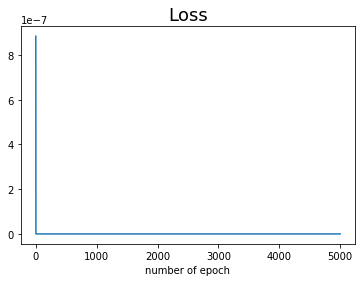

In [19]:
result_linear.timer(state = "start")
loss_linear = result_linear.plot_loss(X_linear,  y_linear)
result_linear.timer(state = "end")

In [20]:
result_linear.timer(state = "show")

Execution time: 27.861504 sec


27.861504077911377

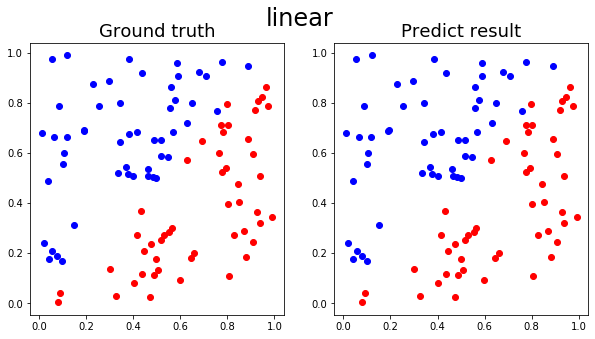

[[0.]
 [0.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [0.]
 [1.]
 [1.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [1.]
 [0.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [1.]
 [0.]
 [0.]
 [1.]
 [1.]
 [0.]
 [1.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [0.]
 [0.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [0.]]


In [21]:
result_linear.show_plot(X_linear, y_linear, "linear")

In [22]:
print(y_linear)

[[0]
 [0]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [1]
 [1]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [0]
 [0]
 [1]
 [1]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [0]]


## Result: XOR

In [23]:
result_XOR = show_result()

Epoch 0  Loss: 0.25125643101874856
Epoch 100  Loss: 0.21383498571284523
Epoch 200  Loss: 0.17983829214273175
Epoch 300  Loss: 0.16557146821581561
Epoch 400  Loss: 0.15732747454470913
Epoch 500  Loss: 0.1519140045896824
Epoch 600  Loss: 0.13711856824036092
Epoch 700  Loss: 0.030820474995248086
Epoch 800  Loss: 0.01721863464207641
Epoch 900  Loss: 0.010667257387944754
Epoch 1000  Loss: 0.007230716513937753
Epoch 1100  Loss: 0.005266488476321092
Epoch 1200  Loss: 0.004049158601222563
Epoch 1300  Loss: 0.0032422470913772866
Epoch 1400  Loss: 0.002677760734187333
Epoch 1500  Loss: 0.0022654682403768036
Epoch 1600  Loss: 0.001953669932336955
Epoch 1700  Loss: 0.0017110631918892973
Epoch 1800  Loss: 0.0015177885815363691
Epoch 1900  Loss: 0.0013607368933722381
Epoch 2000  Loss: 0.0012309566841315245
Epoch 2100  Loss: 0.00112215488121117
Epoch 2200  Loss: 0.001029794125550353
Epoch 2300  Loss: 0.0009505299450981772
Epoch 2400  Loss: 0.0008818488087278508
Epoch 2500  Loss: 0.0008218289126725359

Epoch 20800  Loss: 5.126411655852608e-05
Epoch 20900  Loss: 5.09886537611235e-05
Epoch 21000  Loss: 5.0716065779466774e-05
Epoch 21100  Loss: 5.044630833229971e-05
Epoch 21200  Loss: 5.0179338037205454e-05
Epoch 21300  Loss: 4.9915112388018304e-05
Epoch 21400  Loss: 4.9653589732910353e-05
Epoch 21500  Loss: 4.939472925312899e-05
Epoch 21600  Loss: 4.913849094236536e-05
Epoch 21700  Loss: 4.8884835586732146e-05
Epoch 21800  Loss: 4.86337247453248e-05
Epoch 21900  Loss: 4.8385120731355663e-05
Epoch 22000  Loss: 4.8138986593830794e-05
Epoch 22100  Loss: 4.789528609976162e-05
Epoch 22200  Loss: 4.765398371688436e-05
Epoch 22300  Loss: 4.7415044596875664e-05
Epoch 22400  Loss: 4.717843455904935e-05
Epoch 22500  Loss: 4.6944120074514144e-05
Epoch 22600  Loss: 4.671206825077593e-05
Epoch 22700  Loss: 4.648224681677735e-05
Epoch 22800  Loss: 4.625462410835577e-05
Epoch 22900  Loss: 4.6029169054102e-05
Epoch 23000  Loss: 4.580585116161752e-05
Epoch 23100  Loss: 4.558464050414565e-05
Epoch 23200

Epoch 41700  Loss: 2.383918877046109e-05
Epoch 41800  Loss: 2.3777499253047208e-05
Epoch 41900  Loss: 2.3716122339505254e-05
Epoch 42000  Loss: 2.3655055679428742e-05
Epoch 42100  Loss: 2.3594296945799277e-05
Epoch 42200  Loss: 2.35338438346962e-05
Epoch 42300  Loss: 2.3473694065013836e-05
Epoch 42400  Loss: 2.341384537817779e-05
Epoch 42500  Loss: 2.3354295537871228e-05
Epoch 42600  Loss: 2.329504232976059e-05
Epoch 42700  Loss: 2.3236083561227598e-05
Epoch 42800  Loss: 2.3177417061105044e-05
Epoch 42900  Loss: 2.311904067941441e-05
Epoch 43000  Loss: 2.3060952287110956e-05
Epoch 43100  Loss: 2.300314977582801e-05
Epoch 43200  Loss: 2.294563105763058e-05
Epoch 43300  Loss: 2.288839406476571e-05
Epoch 43400  Loss: 2.2831436749422647e-05
Epoch 43500  Loss: 2.2774757083492532e-05
Epoch 43600  Loss: 2.2718353058333384e-05
Epoch 43700  Loss: 2.266222268453742e-05
Epoch 43800  Loss: 2.2606363991702708e-05
Epoch 43900  Loss: 2.2550775028206474e-05
Epoch 44000  Loss: 2.2495453860984288e-05
Ep

Epoch 62600  Loss: 1.5413082881187807e-05
Epoch 62700  Loss: 1.5386882958254036e-05
Epoch 62800  Loss: 1.536077053829129e-05
Epoch 62900  Loss: 1.5334745186796722e-05
Epoch 63000  Loss: 1.530880647212807e-05
Epoch 63100  Loss: 1.5282953965479555e-05
Epoch 63200  Loss: 1.5257187240858421e-05
Epoch 63300  Loss: 1.5231505875061982e-05
Epoch 63400  Loss: 1.5205909447655496e-05
Epoch 63500  Loss: 1.5180397540948388e-05
Epoch 63600  Loss: 1.5154969739973687e-05
Epoch 63700  Loss: 1.5129625632464628e-05
Epoch 63800  Loss: 1.5104364808832956e-05
Epoch 63900  Loss: 1.5079186862147653e-05
Epoch 64000  Loss: 1.5054091388113718e-05
Epoch 64100  Loss: 1.502907798504939e-05
Epoch 64200  Loss: 1.5004146253867507e-05
Epoch 64300  Loss: 1.497929579805296e-05
Epoch 64400  Loss: 1.4954526223641928e-05
Epoch 64500  Loss: 1.4929837139203273e-05
Epoch 64600  Loss: 1.4905228155815523e-05
Epoch 64700  Loss: 1.4880698887049202e-05
Epoch 64800  Loss: 1.4856248948946108e-05
Epoch 64900  Loss: 1.4831877959999312e

Epoch 83400  Loss: 1.1367263332241603e-05
Epoch 83500  Loss: 1.1352873669172958e-05
Epoch 83600  Loss: 1.133851986458156e-05
Epoch 83700  Loss: 1.1324201785462822e-05
Epoch 83800  Loss: 1.1309919299466129e-05
Epoch 83900  Loss: 1.1295672274891667e-05
Epoch 84000  Loss: 1.1281460580685645e-05
Epoch 84100  Loss: 1.1267284086437589e-05
Epoch 84200  Loss: 1.1253142662374709e-05
Epoch 84300  Loss: 1.1239036179359403e-05
Epoch 84400  Loss: 1.1224964508884872e-05
Epoch 84500  Loss: 1.1210927523071338e-05
Epoch 84600  Loss: 1.1196925094662406e-05
Epoch 84700  Loss: 1.1182957097020377e-05
Epoch 84800  Loss: 1.1169023404124172e-05
Epoch 84900  Loss: 1.1155123890563882e-05
Epoch 85000  Loss: 1.1141258431538333e-05
Epoch 85100  Loss: 1.1127426902850574e-05
Epoch 85200  Loss: 1.1113629180904617e-05
Epoch 85300  Loss: 1.1099865142702171e-05
Epoch 85400  Loss: 1.1086134665838004e-05
Epoch 85500  Loss: 1.1072437628497602e-05
Epoch 85600  Loss: 1.1058773909452566e-05
Epoch 85700  Loss: 1.10451433880577

Epoch 104400  Loss: 8.97111017883143e-06
Epoch 104500  Loss: 8.962085762948252e-06
Epoch 104600  Loss: 8.953079240989938e-06
Epoch 104700  Loss: 8.944090560106026e-06
Epoch 104800  Loss: 8.935119667653196e-06
Epoch 104900  Loss: 8.92616651119358e-06
Epoch 105000  Loss: 8.917231038496028e-06
Epoch 105100  Loss: 8.908313197532306e-06
Epoch 105200  Loss: 8.89941293647779e-06
Epoch 105300  Loss: 8.890530203709799e-06
Epoch 105400  Loss: 8.881664947807423e-06
Epoch 105500  Loss: 8.872817117549464e-06
Epoch 105600  Loss: 8.86398666191405e-06
Epoch 105700  Loss: 8.855173530078198e-06
Epoch 105800  Loss: 8.846377671415164e-06
Epoch 105900  Loss: 8.837599035495348e-06
Epoch 106000  Loss: 8.828837572084808e-06
Epoch 106100  Loss: 8.820093231143155e-06
Epoch 106200  Loss: 8.811365962824626e-06
Epoch 106300  Loss: 8.80265571747548e-06
Epoch 106400  Loss: 8.793962445633441e-06
Epoch 106500  Loss: 8.785286098027647e-06
Epoch 106600  Loss: 8.776626625576403e-06
Epoch 106700  Loss: 8.767983979387683e-

Epoch 125800  Loss: 7.377189607371024e-06
Epoch 125900  Loss: 7.371054744884223e-06
Epoch 126000  Loss: 7.364929948349271e-06
Epoch 126100  Loss: 7.3588151931516326e-06
Epoch 126200  Loss: 7.352710454756036e-06
Epoch 126300  Loss: 7.3466157087072995e-06
Epoch 126400  Loss: 7.340530930629208e-06
Epoch 126500  Loss: 7.334456096224754e-06
Epoch 126600  Loss: 7.328391181275601e-06
Epoch 126700  Loss: 7.322336161641313e-06
Epoch 126800  Loss: 7.316291013259689e-06
Epoch 126900  Loss: 7.310255712146496e-06
Epoch 127000  Loss: 7.304230234394641e-06
Epoch 127100  Loss: 7.298214556174036e-06
Epoch 127200  Loss: 7.292208653731576e-06
Epoch 127300  Loss: 7.286212503390268e-06
Epoch 127400  Loss: 7.280226081549836e-06
Epoch 127500  Loss: 7.274249364685128e-06
Epoch 127600  Loss: 7.268282329347192e-06
Epoch 127700  Loss: 7.262324952161783e-06
Epoch 127800  Loss: 7.2563772098298385e-06
Epoch 127900  Loss: 7.250439079127173e-06
Epoch 128000  Loss: 7.244510536903486e-06
Epoch 128100  Loss: 7.238591560

Epoch 146200  Loss: 6.304603880865402e-06
Epoch 146300  Loss: 6.30010526831466e-06
Epoch 146400  Loss: 6.2956129937044726e-06
Epoch 146500  Loss: 6.291127043721681e-06
Epoch 146600  Loss: 6.286647405090032e-06
Epoch 146700  Loss: 6.282174064570655e-06
Epoch 146800  Loss: 6.277707008961405e-06
Epoch 146900  Loss: 6.273246225096502e-06
Epoch 147000  Loss: 6.268791699847784e-06
Epoch 147100  Loss: 6.264343420122679e-06
Epoch 147200  Loss: 6.259901372865268e-06
Epoch 147300  Loss: 6.255465545056033e-06
Epoch 147400  Loss: 6.251035923711498e-06
Epoch 147500  Loss: 6.246612495884141e-06
Epoch 147600  Loss: 6.242195248662266e-06
Epoch 147700  Loss: 6.237784169169908e-06
Epoch 147800  Loss: 6.233379244566991e-06
Epoch 147900  Loss: 6.2289804620488785e-06
Epoch 148000  Loss: 6.2245878088460075e-06
Epoch 148100  Loss: 6.220201272224274e-06
Epoch 148200  Loss: 6.21582083948492e-06
Epoch 148300  Loss: 6.211446497963793e-06
Epoch 148400  Loss: 6.207078235032108e-06
Epoch 148500  Loss: 6.20271603809

Epoch 166700  Loss: 5.498405949899185e-06
Epoch 166800  Loss: 5.494972891321194e-06
Epoch 166900  Loss: 5.491544067506202e-06
Epoch 167000  Loss: 5.488119470663289e-06
Epoch 167100  Loss: 5.484699093020907e-06
Epoch 167200  Loss: 5.481282926826429e-06
Epoch 167300  Loss: 5.477870964345726e-06
Epoch 167400  Loss: 5.474463197864027e-06
Epoch 167500  Loss: 5.471059619685412e-06
Epoch 167600  Loss: 5.467660222132151e-06
Epoch 167700  Loss: 5.464264997545859e-06
Epoch 167800  Loss: 5.460873938286353e-06
Epoch 167900  Loss: 5.457487036732206e-06
Epoch 168000  Loss: 5.454104285280618e-06
Epoch 168100  Loss: 5.4507256763469605e-06
Epoch 168200  Loss: 5.447351202365282e-06
Epoch 168300  Loss: 5.443980855787789e-06
Epoch 168400  Loss: 5.440614629085283e-06
Epoch 168500  Loss: 5.437252514746683e-06
Epoch 168600  Loss: 5.433894505278935e-06
Epoch 168700  Loss: 5.43054059320709e-06
Epoch 168800  Loss: 5.427190771074866e-06
Epoch 168900  Loss: 5.423845031443187e-06
Epoch 169000  Loss: 5.420503366891

Epoch 187500  Loss: 4.865261995561783e-06
Epoch 187600  Loss: 4.862566372886982e-06
Epoch 187700  Loss: 4.859873702307818e-06
Epoch 187800  Loss: 4.8571839790013335e-06
Epoch 187900  Loss: 4.854497198154792e-06
Epoch 188000  Loss: 4.851813354966371e-06
Epoch 188100  Loss: 4.849132444644145e-06
Epoch 188200  Loss: 4.846454462406892e-06
Epoch 188300  Loss: 4.843779403483779e-06
Epoch 188400  Loss: 4.841107263113969e-06
Epoch 188500  Loss: 4.8384380365472405e-06
Epoch 188600  Loss: 4.835771719043536e-06
Epoch 188700  Loss: 4.833108305873074e-06
Epoch 188800  Loss: 4.830447792316345e-06
Epoch 188900  Loss: 4.827790173663829e-06
Epoch 189000  Loss: 4.825135445216364e-06
Epoch 189100  Loss: 4.822483602284798e-06
Epoch 189200  Loss: 4.819834640190335e-06
Epoch 189300  Loss: 4.817188554263794e-06
Epoch 189400  Loss: 4.814545339846631e-06
Epoch 189500  Loss: 4.811904992289661e-06
Epoch 189600  Loss: 4.809267506954489e-06
Epoch 189700  Loss: 4.806632879211918e-06
Epoch 189800  Loss: 4.8040011044

Epoch 208300  Loss: 4.361709837198033e-06
Epoch 208400  Loss: 4.359538002883291e-06
Epoch 208500  Loss: 4.357368307011258e-06
Epoch 208600  Loss: 4.355200746439954e-06
Epoch 208700  Loss: 4.353035318033581e-06
Epoch 208800  Loss: 4.350872018662546e-06
Epoch 208900  Loss: 4.3487108452037e-06
Epoch 209000  Loss: 4.346551794539259e-06
Epoch 209100  Loss: 4.344394863558148e-06
Epoch 209200  Loss: 4.342240049155033e-06
Epoch 209300  Loss: 4.340087348230815e-06
Epoch 209400  Loss: 4.337936757692211e-06
Epoch 209500  Loss: 4.335788274452261e-06
Epoch 209600  Loss: 4.333641895429583e-06
Epoch 209700  Loss: 4.3314976175491044e-06
Epoch 209800  Loss: 4.329355437741686e-06
Epoch 209900  Loss: 4.3272153529440585e-06
Epoch 210000  Loss: 4.32507736009891e-06
Epoch 210100  Loss: 4.322941456154868e-06
Epoch 210200  Loss: 4.320807638066592e-06
Epoch 210300  Loss: 4.3186759027945075e-06
Epoch 210400  Loss: 4.316546247304955e-06
Epoch 210500  Loss: 4.314418668570105e-06
Epoch 210600  Loss: 4.312293163568

Epoch 228600  Loss: 3.960740138104074e-06
Epoch 228700  Loss: 3.958945498975251e-06
Epoch 228800  Loss: 3.957152468390546e-06
Epoch 228900  Loss: 3.955361044198571e-06
Epoch 229000  Loss: 3.9535712242510855e-06
Epoch 229100  Loss: 3.951783006404254e-06
Epoch 229200  Loss: 3.949996388517749e-06
Epoch 229300  Loss: 3.9482113684551094e-06
Epoch 229400  Loss: 3.946427944083683e-06
Epoch 229500  Loss: 3.9446461132745405e-06
Epoch 229600  Loss: 3.9428658739025705e-06
Epoch 229700  Loss: 3.941087223846557e-06
Epoch 229800  Loss: 3.939310160988635e-06
Epoch 229900  Loss: 3.9375346832153155e-06
Epoch 230000  Loss: 3.935760788416299e-06
Epoch 230100  Loss: 3.933988474485358e-06
Epoch 230200  Loss: 3.932217739319753e-06
Epoch 230300  Loss: 3.9304485808205896e-06
Epoch 230400  Loss: 3.928680996892688e-06
Epoch 230500  Loss: 3.9269149854446034e-06
Epoch 230600  Loss: 3.925150544388359e-06
Epoch 230700  Loss: 3.923387671640031e-06
Epoch 230800  Loss: 3.9216263651190264e-06
Epoch 230900  Loss: 3.9198

Epoch 249800  Loss: 3.6131710970163025e-06
Epoch 249900  Loss: 3.6116747090506616e-06
Epoch 250000  Loss: 3.6101795473830425e-06
Epoch 250100  Loss: 3.608685610513279e-06
Epoch 250200  Loss: 3.607192896943822e-06
Epoch 250300  Loss: 3.6057014051794604e-06
Epoch 250400  Loss: 3.6042111337273635e-06
Epoch 250500  Loss: 3.6027220810971324e-06
Epoch 250600  Loss: 3.6012342458008823e-06
Epoch 250700  Loss: 3.5997476263531295e-06
Epoch 250800  Loss: 3.5982622212707575e-06
Epoch 250900  Loss: 3.596778029072924e-06
Epoch 251000  Loss: 3.595295048281435e-06
Epoch 251100  Loss: 3.5938132774204028e-06
Epoch 251200  Loss: 3.5923327150161827e-06
Epoch 251300  Loss: 3.590853359597895e-06
Epoch 251400  Loss: 3.589375209696401e-06
Epoch 251500  Loss: 3.5878982638456787e-06
Epoch 251600  Loss: 3.5864225205813505e-06
Epoch 251700  Loss: 3.5849479784421266e-06
Epoch 251800  Loss: 3.5834746359685585e-06
Epoch 251900  Loss: 3.582002491703729e-06
Epoch 252000  Loss: 3.5805315441931925e-06
Epoch 252100  Loss

Epoch 270900  Loss: 3.322467145026841e-06
Epoch 271000  Loss: 3.3211996758368875e-06
Epoch 271100  Loss: 3.319933163696498e-06
Epoch 271200  Loss: 3.3186676075268545e-06
Epoch 271300  Loss: 3.317403006250622e-06
Epoch 271400  Loss: 3.3161393587920602e-06
Epoch 271500  Loss: 3.314876664077352e-06
Epoch 271600  Loss: 3.3136149210340687e-06
Epoch 271700  Loss: 3.312354128591358e-06
Epoch 271800  Loss: 3.3110942856800195e-06
Epoch 271900  Loss: 3.3098353912323532e-06
Epoch 272000  Loss: 3.308577444182603e-06
Epoch 272100  Loss: 3.3073204434662296e-06
Epoch 272200  Loss: 3.306064388020285e-06
Epoch 272300  Loss: 3.304809276783768e-06
Epoch 272400  Loss: 3.303555108696782e-06
Epoch 272500  Loss: 3.302301882701419e-06
Epoch 272600  Loss: 3.3010495977410836e-06
Epoch 272700  Loss: 3.299798252760993e-06
Epoch 272800  Loss: 3.2985478467076824e-06
Epoch 272900  Loss: 3.2972983785293134e-06
Epoch 273000  Loss: 3.2960498471759206e-06
Epoch 273100  Loss: 3.294802251598699e-06
Epoch 273200  Loss: 3.2

Epoch 292200  Loss: 3.0725162834177817e-06
Epoch 292300  Loss: 3.0714306445120375e-06
Epoch 292400  Loss: 3.070345765073269e-06
Epoch 292500  Loss: 3.0692616443079903e-06
Epoch 292600  Loss: 3.0681782814242365e-06
Epoch 292700  Loss: 3.0670956756307637e-06
Epoch 292800  Loss: 3.0660138261376512e-06
Epoch 292900  Loss: 3.064932732156157e-06
Epoch 293000  Loss: 3.063852392898351e-06
Epoch 293100  Loss: 3.062772807577513e-06
Epoch 293200  Loss: 3.061693975408189e-06
Epoch 293300  Loss: 3.0606158956057536e-06
Epoch 293400  Loss: 3.059538567386809e-06
Epoch 293500  Loss: 3.058461989969113e-06
Epoch 293600  Loss: 3.057386162571271e-06
Epoch 293700  Loss: 3.0563110844130614e-06
Epoch 293800  Loss: 3.0552367547155837e-06
Epoch 293900  Loss: 3.054163172700569e-06
Epoch 294000  Loss: 3.0530903375913557e-06
Epoch 294100  Loss: 3.052018248612005e-06
Epoch 294200  Loss: 3.0509469049874335e-06
Epoch 294300  Loss: 3.0498763059442293e-06
Epoch 294400  Loss: 3.0488064507096152e-06
Epoch 294500  Loss: 3

Epoch 312900  Loss: 2.8629023536206995e-06
Epoch 313000  Loss: 2.8619584852923445e-06
Epoch 313100  Loss: 2.8610152331995913e-06
Epoch 313200  Loss: 2.8600725967411852e-06
Epoch 313300  Loss: 2.85913057531752e-06
Epoch 313400  Loss: 2.858189168329113e-06
Epoch 313500  Loss: 2.857248375177652e-06
Epoch 313600  Loss: 2.8563081952652817e-06
Epoch 313700  Loss: 2.855368627995343e-06
Epoch 313800  Loss: 2.8544296727714876e-06
Epoch 313900  Loss: 2.853491328998478e-06
Epoch 314000  Loss: 2.852553596081608e-06
Epoch 314100  Loss: 2.8516164734271188e-06
Epoch 314200  Loss: 2.850679960442055e-06
Epoch 314300  Loss: 2.849744056534014e-06
Epoch 314400  Loss: 2.84880876111129e-06
Epoch 314500  Loss: 2.8478740735834597e-06
Epoch 314600  Loss: 2.8469399933604323e-06
Epoch 314700  Loss: 2.8460065198528453e-06
Epoch 314800  Loss: 2.845073652472271e-06
Epoch 314900  Loss: 2.8441413906310294e-06
Epoch 315000  Loss: 2.8432097337421633e-06
Epoch 315100  Loss: 2.8422786812194742e-06
Epoch 315200  Loss: 2.8

Epoch 333500  Loss: 2.680667933415771e-06
Epoch 333600  Loss: 2.679839357080399e-06
Epoch 333700  Loss: 2.6790112880173845e-06
Epoch 333800  Loss: 2.678183725762962e-06
Epoch 333900  Loss: 2.6773566698537527e-06
Epoch 334000  Loss: 2.676530119827164e-06
Epoch 334100  Loss: 2.675704075221114e-06
Epoch 334200  Loss: 2.6748785355739997e-06
Epoch 334300  Loss: 2.674053500424874e-06
Epoch 334400  Loss: 2.6732289693132447e-06
Epoch 334500  Loss: 2.6724049417792373e-06
Epoch 334600  Loss: 2.6715814173636048e-06
Epoch 334700  Loss: 2.6707583956074406e-06
Epoch 334800  Loss: 2.6699358760527055e-06
Epoch 334900  Loss: 2.6691138582416963e-06
Epoch 335000  Loss: 2.6682923417172747e-06
Epoch 335100  Loss: 2.667471326022987e-06
Epoch 335200  Loss: 2.6666508107027107e-06
Epoch 335300  Loss: 2.6658307953011303e-06
Epoch 335400  Loss: 2.6650112793633846e-06
Epoch 335500  Loss: 2.664192262434985e-06
Epoch 335600  Loss: 2.6633737440623194e-06
Epoch 335700  Loss: 2.662555723792041e-06
Epoch 335800  Loss: 

Epoch 353800  Loss: 2.5222669394439185e-06
Epoch 353900  Loss: 2.521532549869214e-06
Epoch 354000  Loss: 2.520798583899748e-06
Epoch 354100  Loss: 2.520065041170493e-06
Epoch 354200  Loss: 2.5193319213171277e-06
Epoch 354300  Loss: 2.518599223975208e-06
Epoch 354400  Loss: 2.5178669487813045e-06
Epoch 354500  Loss: 2.5171350953721333e-06
Epoch 354600  Loss: 2.516403663384752e-06
Epoch 354700  Loss: 2.515672652456735e-06
Epoch 354800  Loss: 2.514942062226113e-06
Epoch 354900  Loss: 2.5142118923312762e-06
Epoch 355000  Loss: 2.51348214241091e-06
Epoch 355100  Loss: 2.512752812104312e-06
Epoch 355200  Loss: 2.512023901051068e-06
Epoch 355300  Loss: 2.511295408891373e-06
Epoch 355400  Loss: 2.510567335265427e-06
Epoch 355500  Loss: 2.50983967981433e-06
Epoch 355600  Loss: 2.5091124421792075e-06
Epoch 355700  Loss: 2.508385622001708e-06
Epoch 355800  Loss: 2.507659218924078e-06
Epoch 355900  Loss: 2.506933232588619e-06
Epoch 356000  Loss: 2.5062076626383917e-06
Epoch 356100  Loss: 2.5054825

Epoch 374000  Loss: 2.3820525878230514e-06
Epoch 374100  Loss: 2.3813968860361066e-06
Epoch 374200  Loss: 2.3807415418792657e-06
Epoch 374300  Loss: 2.3800865550613823e-06
Epoch 374400  Loss: 2.3794319252913307e-06
Epoch 374500  Loss: 2.378777652278451e-06
Epoch 374600  Loss: 2.378123735732409e-06
Epoch 374700  Loss: 2.3774701753628355e-06
Epoch 374800  Loss: 2.3768169708801983e-06
Epoch 374900  Loss: 2.3761641219948846e-06
Epoch 375000  Loss: 2.375511628417944e-06
Epoch 375100  Loss: 2.3748594898601935e-06
Epoch 375200  Loss: 2.3742077060334865e-06
Epoch 375300  Loss: 2.373556276649271e-06
Epoch 375400  Loss: 2.3729052014197958e-06
Epoch 375500  Loss: 2.3722544800575146e-06
Epoch 375600  Loss: 2.3716041122751125e-06
Epoch 375700  Loss: 2.3709540977854575e-06
Epoch 375800  Loss: 2.370304436302056e-06
Epoch 375900  Loss: 2.3696551275386265e-06
Epoch 376000  Loss: 2.3690061712087917e-06
Epoch 376100  Loss: 2.368357567027128e-06
Epoch 376200  Loss: 2.3677093147080974e-06
Epoch 376300  Los

Epoch 394100  Loss: 2.2570762116565786e-06
Epoch 394200  Loss: 2.256486931708787e-06
Epoch 394300  Loss: 2.2558979566471277e-06
Epoch 394400  Loss: 2.255309286236123e-06
Epoch 394500  Loss: 2.254720920240155e-06
Epoch 394600  Loss: 2.254132858424277e-06
Epoch 394700  Loss: 2.253545100553511e-06
Epoch 394800  Loss: 2.2529576463931056e-06
Epoch 394900  Loss: 2.2523704957086596e-06
Epoch 395000  Loss: 2.2517836482659706e-06
Epoch 395100  Loss: 2.251197103831208e-06
Epoch 395200  Loss: 2.250610862170537e-06
Epoch 395300  Loss: 2.25002492305054e-06
Epoch 395400  Loss: 2.2494392862379654e-06
Epoch 395500  Loss: 2.2488539514997627e-06
Epoch 395600  Loss: 2.2482689186032376e-06
Epoch 395700  Loss: 2.24768418731594e-06
Epoch 395800  Loss: 2.247099757405461e-06
Epoch 395900  Loss: 2.246515628639923e-06
Epoch 396000  Loss: 2.245931800787301e-06
Epoch 396100  Loss: 2.2453482736161983e-06
Epoch 396200  Loss: 2.244765046895297e-06
Epoch 396300  Loss: 2.2441821203933375e-06
Epoch 396400  Loss: 2.2435

Epoch 414100  Loss: 2.14499288478879e-06
Epoch 414200  Loss: 2.1444601920132882e-06
Epoch 414300  Loss: 2.1439277614368896e-06
Epoch 414400  Loss: 2.143395592866755e-06
Epoch 414500  Loss: 2.142863686110215e-06
Epoch 414600  Loss: 2.1423320409750425e-06
Epoch 414700  Loss: 2.141800657268749e-06
Epoch 414800  Loss: 2.1412695347995525e-06
Epoch 414900  Loss: 2.140738673375411e-06
Epoch 415000  Loss: 2.1402080728046253e-06
Epoch 415100  Loss: 2.139677732895869e-06
Epoch 415200  Loss: 2.1391476534577543e-06
Epoch 415300  Loss: 2.1386178342990978e-06
Epoch 415400  Loss: 2.1380882752290282e-06
Epoch 415500  Loss: 2.137558976056772e-06
Epoch 415600  Loss: 2.137029936591876e-06
Epoch 415700  Loss: 2.1365011566439214e-06
Epoch 415800  Loss: 2.1359726360226736e-06
Epoch 415900  Loss: 2.135444374538172e-06
Epoch 416000  Loss: 2.1349163720006194e-06
Epoch 416100  Loss: 2.1343886282203633e-06
Epoch 416200  Loss: 2.1338611430079598e-06
Epoch 416300  Loss: 2.1333339161741675e-06
Epoch 416400  Loss: 2

Epoch 433700  Loss: 2.045368203709688e-06
Epoch 433800  Loss: 2.044883437531932e-06
Epoch 433900  Loss: 2.0443988991018665e-06
Epoch 434000  Loss: 2.0439145882597355e-06
Epoch 434100  Loss: 2.043430504845633e-06
Epoch 434200  Loss: 2.0429466487002415e-06
Epoch 434300  Loss: 2.0424630196640443e-06
Epoch 434400  Loss: 2.0419796175776754e-06
Epoch 434500  Loss: 2.041496442282206e-06
Epoch 434600  Loss: 2.041013493618501e-06
Epoch 434700  Loss: 2.040530771427817e-06
Epoch 434800  Loss: 2.040048275551509e-06
Epoch 434900  Loss: 2.03956600583106e-06
Epoch 435000  Loss: 2.0390839621080633e-06
Epoch 435100  Loss: 2.0386021442244027e-06
Epoch 435200  Loss: 2.0381205520217925e-06
Epoch 435300  Loss: 2.037639185342466e-06
Epoch 435400  Loss: 2.0371580440285188e-06
Epoch 435500  Loss: 2.0366771279224223e-06
Epoch 435600  Loss: 2.0361964368667018e-06
Epoch 435700  Loss: 2.0357159707039453e-06
Epoch 435800  Loss: 2.035235729276877e-06
Epoch 435900  Loss: 2.0347557124287044e-06
Epoch 436000  Loss: 2.

Epoch 453900  Loss: 1.9518621971597736e-06
Epoch 454000  Loss: 1.9514203816563377e-06
Epoch 454100  Loss: 1.950978764419348e-06
Epoch 454200  Loss: 1.950537345315891e-06
Epoch 454300  Loss: 1.9500961242130344e-06
Epoch 454400  Loss: 1.9496551009781976e-06
Epoch 454500  Loss: 1.94921427547875e-06
Epoch 454600  Loss: 1.9487736475822645e-06
Epoch 454700  Loss: 1.9483332171563756e-06
Epoch 454800  Loss: 1.9478929840687795e-06
Epoch 454900  Loss: 1.9474529481875504e-06
Epoch 455000  Loss: 1.947013109380559e-06
Epoch 455100  Loss: 1.9465734675158597e-06
Epoch 455200  Loss: 1.9461340224619085e-06
Epoch 455300  Loss: 1.9456947740869993e-06
Epoch 455400  Loss: 1.9452557222595173e-06
Epoch 455500  Loss: 1.944816866848052e-06
Epoch 455600  Loss: 1.944378207721442e-06
Epoch 455700  Loss: 1.9439397447484285e-06
Epoch 455800  Loss: 1.9435014777979413e-06
Epoch 455900  Loss: 1.9430634067390986e-06
Epoch 456000  Loss: 1.9426255314411024e-06
Epoch 456100  Loss: 1.9421878517731487e-06
Epoch 456200  Loss

Epoch 474000  Loss: 1.8668726892653913e-06
Epoch 474100  Loss: 1.866468203113649e-06
Epoch 474200  Loss: 1.866063890726348e-06
Epoch 474300  Loss: 1.8656597519919774e-06
Epoch 474400  Loss: 1.8652557867990444e-06
Epoch 474500  Loss: 1.8648519950363114e-06
Epoch 474600  Loss: 1.8644483765924132e-06
Epoch 474700  Loss: 1.8640449313562658e-06
Epoch 474800  Loss: 1.8636416592167283e-06
Epoch 474900  Loss: 1.8632385600628877e-06
Epoch 475000  Loss: 1.8628356337839292e-06
Epoch 475100  Loss: 1.8624328802688946e-06
Epoch 475200  Loss: 1.8620302994073128e-06
Epoch 475300  Loss: 1.8616278910884721e-06
Epoch 475400  Loss: 1.861225655201841e-06
Epoch 475500  Loss: 1.8608235916370757e-06
Epoch 475600  Loss: 1.8604217002839e-06
Epoch 475700  Loss: 1.8600199810319178e-06
Epoch 475800  Loss: 1.8596184337712743e-06
Epoch 475900  Loss: 1.8592170583918126e-06
Epoch 476000  Loss: 1.8588158547835366e-06
Epoch 476100  Loss: 1.8584148228366816e-06
Epoch 476200  Loss: 1.8580139624414472e-06
Epoch 476300  Los

Epoch 494200  Loss: 1.7885492747367932e-06
Epoch 494300  Loss: 1.788177747042564e-06
Epoch 494400  Loss: 1.78780637238624e-06
Epoch 494500  Loss: 1.787435150673604e-06
Epoch 494600  Loss: 1.7870640818104113e-06
Epoch 494700  Loss: 1.7866931657028947e-06
Epoch 494800  Loss: 1.7863224022569708e-06
Epoch 494900  Loss: 1.7859517913786172e-06
Epoch 495000  Loss: 1.785581332974194e-06
Epoch 495100  Loss: 1.7852110269498753e-06
Epoch 495200  Loss: 1.7848408732119784e-06
Epoch 495300  Loss: 1.784470871666986e-06
Epoch 495400  Loss: 1.7841010222214727e-06
Epoch 495500  Loss: 1.7837313247817986e-06
Epoch 495600  Loss: 1.783361779254718e-06
Epoch 495700  Loss: 1.7829923855470091e-06
Epoch 495800  Loss: 1.7826231435653823e-06
Epoch 495900  Loss: 1.782254053216782e-06
Epoch 496000  Loss: 1.7818851144079904e-06
Epoch 496100  Loss: 1.7815163270463772e-06
Epoch 496200  Loss: 1.7811476910386693e-06
Epoch 496300  Loss: 1.7807792062922536e-06
Epoch 496400  Loss: 1.7804108727143327e-06
Epoch 496500  Loss:

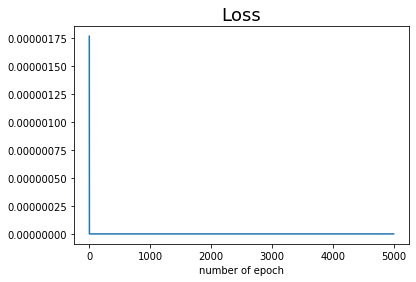

In [24]:
result_XOR.timer(state = "start")
loss_XOR = result_XOR.plot_loss(X_XOR,  y_XOR)
result_XOR.timer(state = "end")

In [25]:
result_XOR.timer(state = "show")

Execution time: 19.973185 sec


19.97318458557129

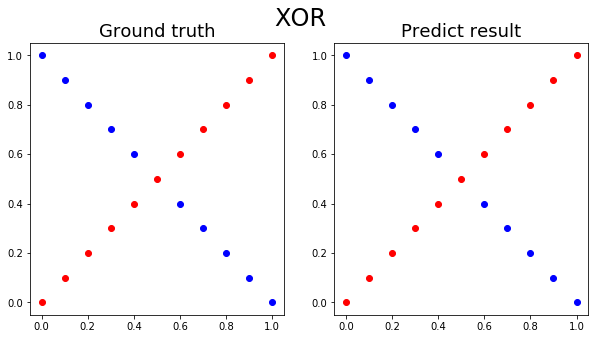

[[0.]
 [1.]
 [0.]
 [1.]
 [0.]
 [1.]
 [0.]
 [1.]
 [0.]
 [1.]
 [0.]
 [0.]
 [1.]
 [0.]
 [1.]
 [0.]
 [1.]
 [0.]
 [1.]
 [0.]
 [1.]]


In [26]:
result_XOR.show_plot(X_XOR, y_XOR, "XOR")

In [27]:
print(y_XOR)

[[0]
 [1]
 [0]
 [1]
 [0]
 [1]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [1]
 [0]
 [1]
 [0]
 [1]]
